In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data_path = "datacleaning.csv"
df = pd.read_csv(data_path)

In [4]:
df

,artist_name,music_name,music_id,release_date,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key
0,Adele,Easy On Me,0gplL1WMoJ6iYaPgMCL0gX,2021-10-14,100,0.57800,0.604,224694,0.366,0.000000,0.1330,0.130,-7.519,0.0282,141.981,5
1,Rosalía,LA FAMA (with The Weeknd),6dmXZ9B5HdFAyzHeTneYBK,2021-11-11,85,0.94600,0.770,188102,0.302,0.000034,0.1250,0.821,-7.911,0.0466,136.010,0
2,DojaCat,Woman,6Uj1ctrBOjOas8xZXGqKk4,2021-06-25,95,0.08880,0.824,172626,0.764,0.002940,0.1170,0.881,-4.175,0.0854,107.998,5
3,Adele,Oh My God,3Kkjo3cT83cw09VJyrLNwX,2021-11-19,83,0.09100,0.534,225148,0.725,0.000000,0.0264,0.550,-3.906,0.0460,88.098,1
4,TravisScott,ESCAPE PLAN,4R67rQNSbbsR4TdUVOIdez,2021-11-05,87,0.00207,0.839,149610,0.506,0.000000,0.1300,0.440,-6.714,0.1330,154.120,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25027,KellyClarkson,I Dare You,0o58NWBiVXewJNfNDKQyjw,2020-04-16,69,0.04520,0.655,216107,0.719,0.000018,0.1090,0.435,-7.400,0.0368,124.034,2
25028,Legado7 JuniorH,Ojos De Maniaco,52Cpyvd2dKb6XRn313nH87,2020-02-28,68,0.21000,0.795,218501,0.585,0.000001,0.1120,0.934,-4.451,0.0374,97.479,8
25029,LeonBridges TerraceMartin,Sweeter (feat. Terrace Martin),1ehhGlTvjtHo2e4xJFB0SZ,2020-06-08,64,0.01670,0.719,167468,0.385,0.031300,0.1110,0.270,-10.907,0.0403,128.000,8
25030,Kygo OhWonder,How Would I Know,52eycxprLhK3lPcRLbQiVk,2020-05-29,70,0.53800,0.514,180700,0.539,0.002330,0.1080,0.153,-9.332,0.1050,123.700,7


In [5]:
continuous_features = df.select_dtypes(include='float').columns.to_list()
continuous_features

['acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'valence',
 'loudness',
 'speechiness',
 'tempo']

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[continuous_features])
df[continuous_features] = scaler.transform(df.loc[:, continuous_features])
df[continuous_features].head(5)

,acousticness,danceability,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo
0,0.581488,0.583559,0.362017,0.000000,0.244444,0.130908,0.680053,0.051891,0.647779
1,0.951710,0.763583,0.297514,0.000156,0.228283,0.826786,0.665117,0.213720,0.610895
2,0.089335,0.822145,0.763150,0.013611,0.212121,0.887209,0.807468,0.554969,0.437861
3,0.091548,0.507646,0.723843,0.000000,0.029091,0.553873,0.817718,0.208443,0.314936
4,0.002081,0.838412,0.503119,0.000000,0.238384,0.443096,0.710726,0.973615,0.722763


In [7]:
df

,artist_name,music_name,music_id,release_date,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key
0,Adele,Easy On Me,0gplL1WMoJ6iYaPgMCL0gX,2021-10-14,100,0.581488,0.583559,224694,0.362017,0.000000,0.244444,0.130908,0.680053,0.051891,0.647779,5
1,Rosalía,LA FAMA (with The Weeknd),6dmXZ9B5HdFAyzHeTneYBK,2021-11-11,85,0.951710,0.763583,188102,0.297514,0.000156,0.228283,0.826786,0.665117,0.213720,0.610895,0
2,DojaCat,Woman,6Uj1ctrBOjOas8xZXGqKk4,2021-06-25,95,0.089335,0.822145,172626,0.763150,0.013611,0.212121,0.887209,0.807468,0.554969,0.437861,5
3,Adele,Oh My God,3Kkjo3cT83cw09VJyrLNwX,2021-11-19,83,0.091548,0.507646,225148,0.723843,0.000000,0.029091,0.553873,0.817718,0.208443,0.314936,1
4,TravisScott,ESCAPE PLAN,4R67rQNSbbsR4TdUVOIdez,2021-11-05,87,0.002081,0.838412,149610,0.503119,0.000000,0.238384,0.443096,0.710726,0.973615,0.722763,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25027,KellyClarkson,I Dare You,0o58NWBiVXewJNfNDKQyjw,2020-04-16,69,0.045471,0.638868,216107,0.717796,0.000082,0.195960,0.438061,0.684588,0.127529,0.536918,2
25028,Legado7 JuniorH,Ojos De Maniaco,52Cpyvd2dKb6XRn313nH87,2020-02-28,68,0.211266,0.790695,218501,0.582741,0.000006,0.202020,0.940583,0.796952,0.132806,0.372884,8
25029,LeonBridges TerraceMartin,Sweeter (feat. Terrace Martin),1ehhGlTvjtHo2e4xJFB0SZ,2020-06-08,64,0.016799,0.708275,167468,0.381167,0.144907,0.200000,0.271896,0.550962,0.158311,0.561416,8
25030,Kygo OhWonder,How Would I Know,52eycxprLhK3lPcRLbQiVk,2020-05-29,70,0.541247,0.485956,180700,0.536379,0.010787,0.193939,0.154070,0.610974,0.727353,0.534855,7


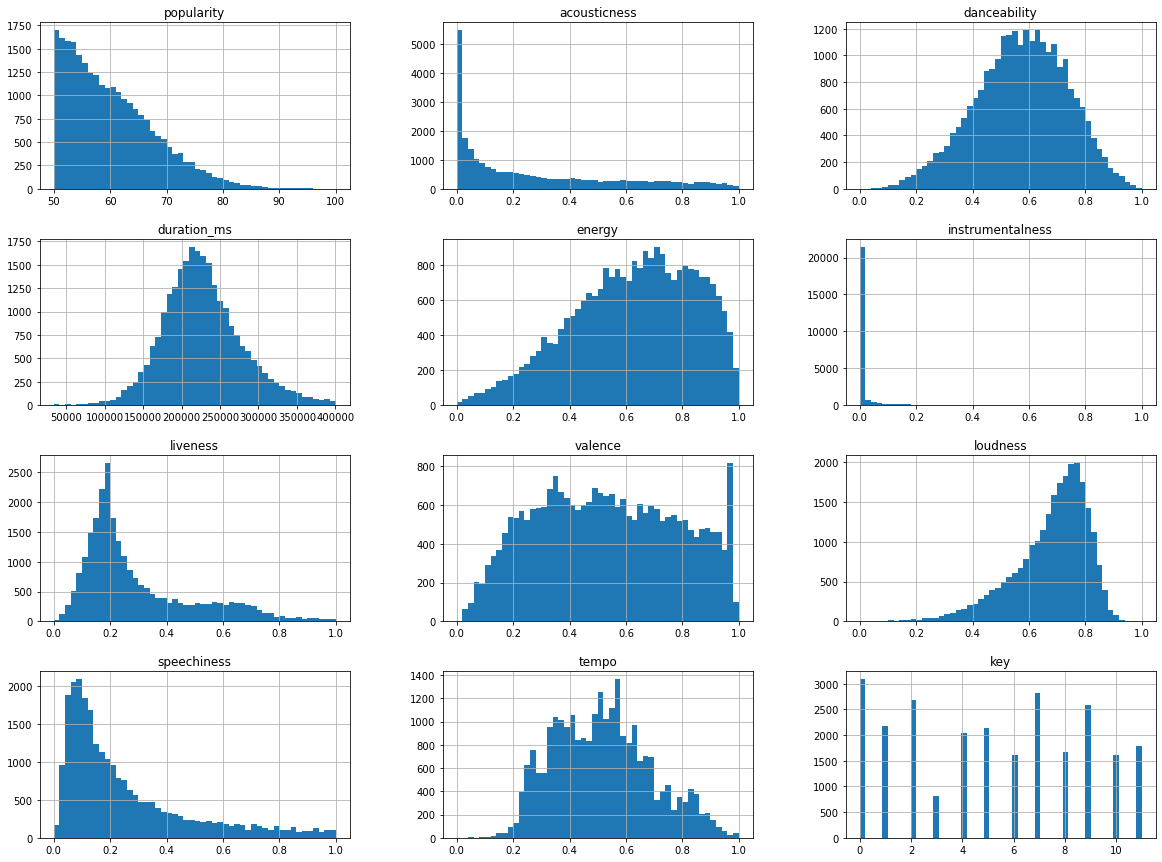

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

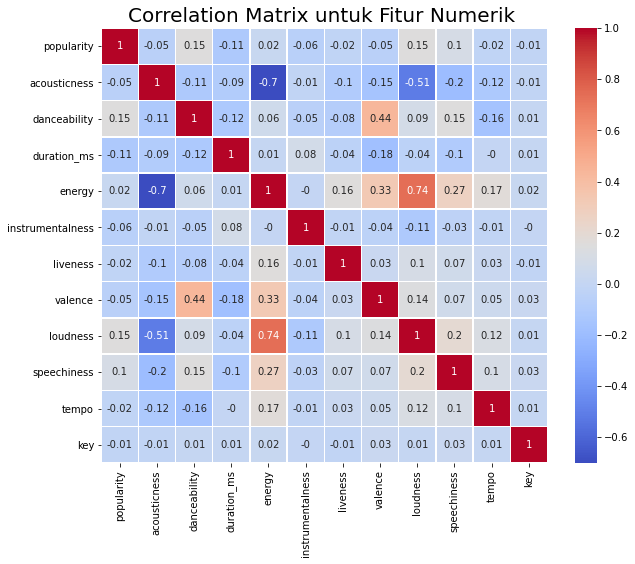

In [9]:
import seaborn as sns

plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

## Clustering

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline


col_features = ['energy', 'valence']
X = df[col_features]
kmeans = KMeans(init="k-means++",
                n_clusters=4,
                random_state=15).fit(X)

df['moods'] = kmeans.labels_

In [18]:
df

,artist_name,music_name,music_id,release_date,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,moods
0,Adele,Easy On Me,0gplL1WMoJ6iYaPgMCL0gX,2021-10-14,100,0.581488,0.583559,224694,0.362017,0.000000,0.244444,0.130908,0.680053,0.051891,0.647779,5,1
1,Rosalía,LA FAMA (with The Weeknd),6dmXZ9B5HdFAyzHeTneYBK,2021-11-11,85,0.951710,0.763583,188102,0.297514,0.000156,0.228283,0.826786,0.665117,0.213720,0.610895,0,2
2,DojaCat,Woman,6Uj1ctrBOjOas8xZXGqKk4,2021-06-25,95,0.089335,0.822145,172626,0.763150,0.013611,0.212121,0.887209,0.807468,0.554969,0.437861,5,3
3,Adele,Oh My God,3Kkjo3cT83cw09VJyrLNwX,2021-11-19,83,0.091548,0.507646,225148,0.723843,0.000000,0.029091,0.553873,0.817718,0.208443,0.314936,1,0
4,TravisScott,ESCAPE PLAN,4R67rQNSbbsR4TdUVOIdez,2021-11-05,87,0.002081,0.838412,149610,0.503119,0.000000,0.238384,0.443096,0.710726,0.973615,0.722763,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25027,KellyClarkson,I Dare You,0o58NWBiVXewJNfNDKQyjw,2020-04-16,69,0.045471,0.638868,216107,0.717796,0.000082,0.195960,0.438061,0.684588,0.127529,0.536918,2,0
25028,Legado7 JuniorH,Ojos De Maniaco,52Cpyvd2dKb6XRn313nH87,2020-02-28,68,0.211266,0.790695,218501,0.582741,0.000006,0.202020,0.940583,0.796952,0.132806,0.372884,8,2
25029,LeonBridges TerraceMartin,Sweeter (feat. Terrace Martin),1ehhGlTvjtHo2e4xJFB0SZ,2020-06-08,64,0.016799,0.708275,167468,0.381167,0.144907,0.200000,0.271896,0.550962,0.158311,0.561416,8,1
25030,Kygo OhWonder,How Would I Know,52eycxprLhK3lPcRLbQiVk,2020-05-29,70,0.541247,0.485956,180700,0.536379,0.010787,0.193939,0.154070,0.610974,0.727353,0.534855,7,1


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


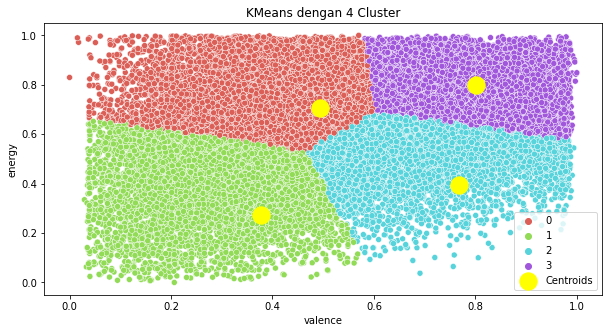

In [19]:
# membuat plot KMeans dengan 4 klaster
plt.figure(figsize=(10,5))
sns.scatterplot(df['valence'], df['energy'], hue=df['moods'],
                palette=sns.color_palette('hls', 4))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.legend()
plt.title('KMeans dengan 4 Cluster')
plt.show()

In [20]:
df = df.replace({'moods' : { 0 : 'Anxious', 1 : 'Sad', 2 : 'Relaxed', 3 : 'Happy' }})

In [21]:
df.head()

,artist_name,music_name,music_id,release_date,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,moods
0,Adele,Easy On Me,0gplL1WMoJ6iYaPgMCL0gX,2021-10-14,100,0.581488,0.583559,224694,0.362017,0.000000,0.244444,0.130908,0.680053,0.051891,0.647779,5,Sad
1,Rosalía,LA FAMA (with The Weeknd),6dmXZ9B5HdFAyzHeTneYBK,2021-11-11,85,0.951710,0.763583,188102,0.297514,0.000156,0.228283,0.826786,0.665117,0.213720,0.610895,0,Relaxed
2,DojaCat,Woman,6Uj1ctrBOjOas8xZXGqKk4,2021-06-25,95,0.089335,0.822145,172626,0.763150,0.013611,0.212121,0.887209,0.807468,0.554969,0.437861,5,Happy
3,Adele,Oh My God,3Kkjo3cT83cw09VJyrLNwX,2021-11-19,83,0.091548,0.507646,225148,0.723843,0.000000,0.029091,0.553873,0.817718,0.208443,0.314936,1,Anxious
4,TravisScott,ESCAPE PLAN,4R67rQNSbbsR4TdUVOIdez,2021-11-05,87,0.002081,0.838412,149610,0.503119,0.000000,0.238384,0.443096,0.710726,0.973615,0.722763,5,Sad


In [22]:
df.groupby(['moods']).mean()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key
moods,,,,,,,,,,,,
Anxious,60.256772,0.109233,0.524501,233844.504284,0.767333,0.035390,0.319514,0.393324,0.753484,0.300656,0.536388,5.197899
Happy,59.546950,0.156555,0.634297,220770.595993,0.800590,0.031310,0.316215,0.796410,0.740245,0.282586,0.536177,5.388457
Relaxed,59.220769,0.369959,0.648891,217036.119174,0.493858,0.029727,0.276769,0.706515,0.613333,0.237037,0.497125,5.212592
Sad,59.745013,0.507491,0.504355,234180.665701,0.376663,0.036662,0.262126,0.272999,0.577266,0.175377,0.486740,5.069015


In [23]:
df.to_csv("clustering.csv", index=False)